In [1]:
from dowhy import CausalModel
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
plt.rcParams["font.family"] = "서울한강 장체L"
river = pd.read_excel("data/연도더미미세먼지_04221513.xlsx")
print(river.shape)
river.head()

(270, 29)


,관측소,is_2015,is_2016,is_2017,is_2018,is_2019,is_2020,미세먼지,토지,소매(범위),...,최고기온(°C),평균최저기온(°C),최고기온 나타난날(yyyymmdd),최저기온(°C),최저기온 나타난날(yyyymmdd),평균 풍속(m/s),최대 순간 풍속(m/s),최대 순간 풍속 풍향(deg),최대 순간 풍속 나타난날(yyyymmdd),강수량합(mm)
0,강남구(삼성2동),1,0,0,0,0,0,45.572411,75.457170,2,...,35.5,10.6,20150711.0,-11.1,20150208.0,1.7,18.1,NaN,20150603.0,818.0
1,강남구(삼성2동),0,1,0,0,0,0,51.029344,72.504378,3,...,36.4,10.8,20160805.0,-16.5,20160124.0,1.7,16.5,295.3,20160504.0,1005.5
2,강남구(삼성2동),0,0,1,0,0,0,43.959616,68.389662,3,...,37.2,10.0,20170805.0,-11.3,20171212.0,1.7,21.9,NaN,20171219.0,1246.0
3,강남구(삼성2동),0,0,0,1,0,0,34.949233,69.444444,3,...,40.0,10.0,20180801.0,-17.0,20180126.0,1.6,16.1,208.1,20180410.0,1312.5
4,강남구(삼성2동),0,0,0,0,1,0,39.290712,69.920844,3,...,37.7,NaN,20190806.0,-9.6,20191231.0,NaN,13.3,222.2,20190330.0,981.5


In [3]:
from matplotlib import font_manager, rc
font_path = "data/THEdog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
print(font_name)
rc('font', family=font_name)

THEGaeideuk


In [ ]:
def month_to_season(x):
    if x in [3,4,5]:
        y = "spring"
    elif x in [6,7,8]:
        y = "summer"
    elif x in [9,10,11]:
        y = "autumn"
    else:
        y = "winter"
    return (y)

def weather(x):
    if   x==1:
        y = "clear"
    elif x==2:
        y = "cloudy"
    elif x==3:
        y = "light_rainy"
    else:
        y = "heavy_rainy"
    return (y)

In [4]:
# 1. 원핫 인코딩 생성
land_dummies = pd.get_dummies(river['부동산더미'])
restore_dummies= pd.get_dummies(river['복원하천더미'])
river = pd.concat([river,land_dummies,restore_dummies],axis=1)

# 2. 변수 삭제
river = river.drop(["casual","registered"],axis=1)

KeyError: '부동산더미'

<ipython-input-13-7492181884db>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels('관측소', rotation=90, ha='right')
<ipython-input-13-7492181884db>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels('관측소', rotation=90, ha='right')
<ipython-input-13-7492181884db>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels('관측소', rotation=90, ha='right')
<ipython-input-13-7492181884db>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels('관측소', rotation=90, ha='right')


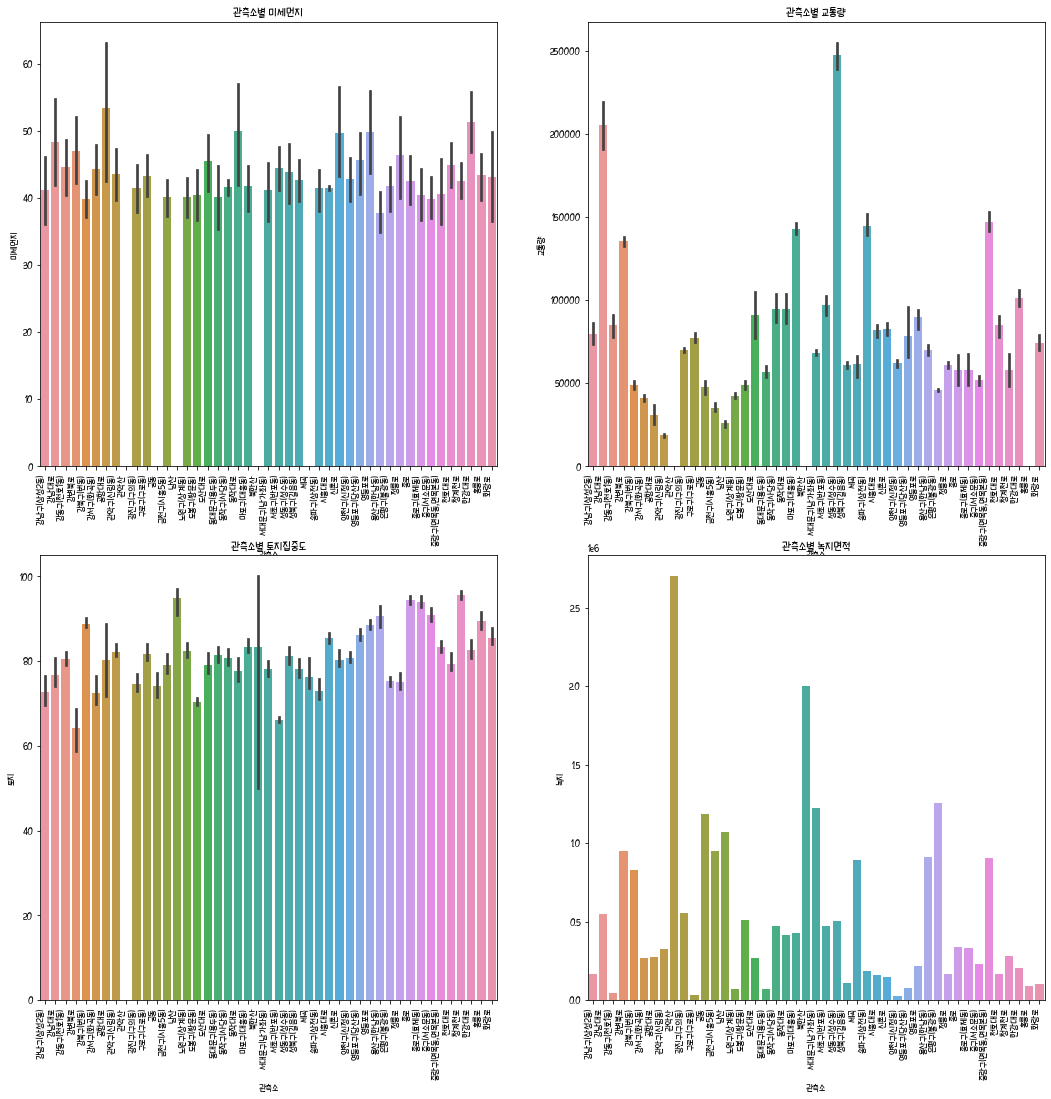

In [13]:

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
fig.set_size_inches(18,18)
ax1.set_xticklabels('관측소', rotation=90, ha='right')
ax2.set_xticklabels('관측소', rotation=90, ha='right')
ax3.set_xticklabels('관측소', rotation=90, ha='right')
ax4.set_xticklabels('관측소', rotation=90, ha='right')

sns.barplot(x="관측소",y="미세먼지", data = river,ax=ax1)
sns.barplot(x="관측소",y="교통량", data = river,ax=ax2)
sns.barplot(x="관측소",y="토지", data = river,ax=ax3)
sns.barplot(x="관측소",y="녹지", data = river,ax=ax4)
ax1.set(title = "관측소별 미세먼지")
ax2.set(title = "관측소별 교통량")
ax3.set(title = "관측소별 토지집중도")
ax4.set(title = "관측소별 녹지면적")

plt.savefig("output/case1.png")

<ipython-input-21-4a2cd1737fdb>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels('관측소', rotation=90, ha='right')


[Text(0.5, 1.0, '관측소별 미세먼지')]

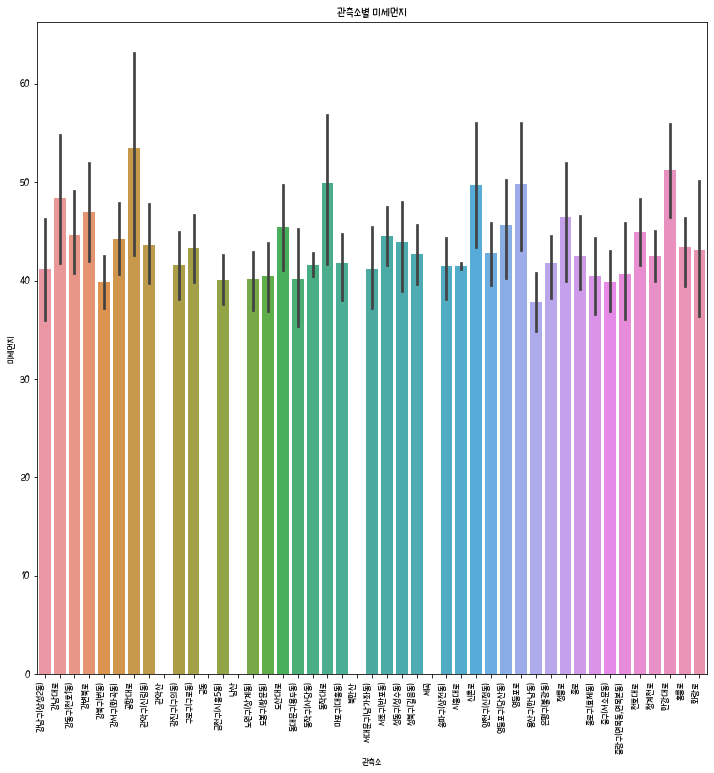

In [21]:
fig,ax1 = plt.subplots(1,1)
fig.set_size_inches(12,12)
ax1.set_xticklabels('관측소', rotation=90, ha='right')


sns.barplot(x="관측소",y="미세먼지", data = river,ax=ax1)

ax1.set(title = "관측소별 미세먼지")

#plt.savefig("output/case1.png")

<ipython-input-15-05f5b925a2a8>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels('관측소', rotation=90, ha='right')
<ipython-input-15-05f5b925a2a8>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels('관측소', rotation=90, ha='right')
<ipython-input-15-05f5b925a2a8>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels('관측소', rotation=90, ha='right')
<ipython-input-15-05f5b925a2a8>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels('관측소', rotation=90, ha='right')


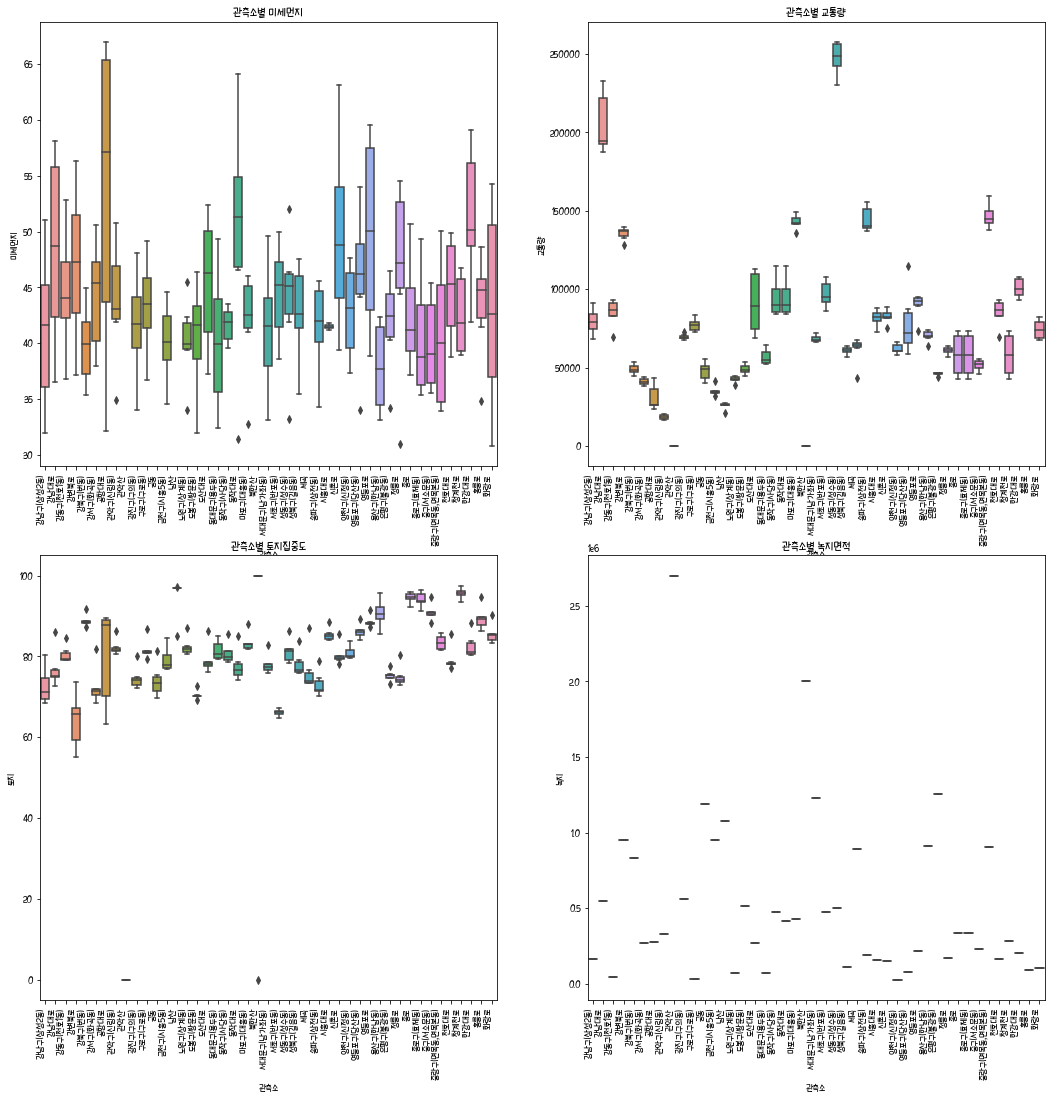

In [15]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
fig.set_size_inches(18,18)
ax1.set_xticklabels('관측소', rotation=90, ha='right')
ax2.set_xticklabels('관측소', rotation=90, ha='right')
ax3.set_xticklabels('관측소', rotation=90, ha='right')
ax4.set_xticklabels('관측소', rotation=90, ha='right')

sns.boxplot(x="관측소",y="미세먼지", data = river,ax=ax1)
sns.boxplot(x="관측소",y="교통량", data = river,ax=ax2)
sns.boxplot(x="관측소",y="토지", data = river,ax=ax3)
sns.boxplot(x="관측소",y="녹지", data = river,ax=ax4)
ax1.set(title = "관측소별 미세먼지")
ax2.set(title = "관측소별 교통량")
ax3.set(title = "관측소별 토지집중도")
ax4.set(title = "관측소별 녹지면적")

plt.savefig("output/case2.png")

<AxesSubplot:xlabel='관측소', ylabel='녹지'>

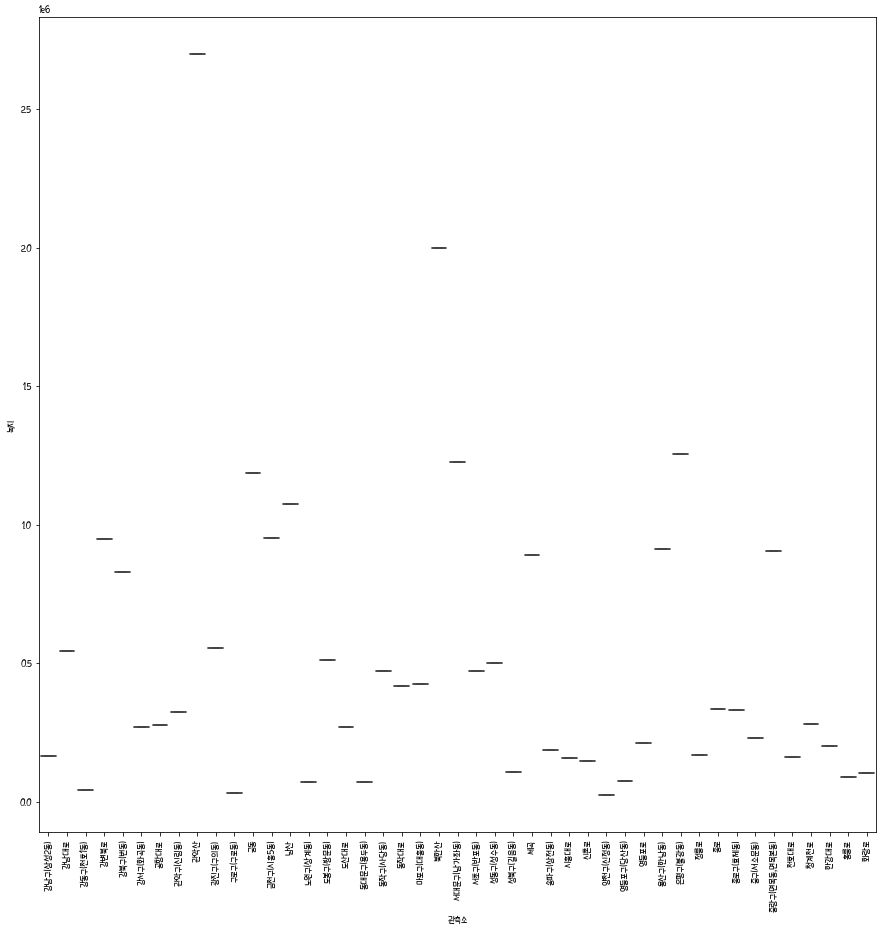

In [7]:
fig.set_size_inches(30,30)
plt.rcParams['figure.figsize'] = [15, 15] # [width, height] (inches)
plt.xticks(rotation = 90 )
sns.boxplot(x="관측소",y="녹지", data = river,)

<ipython-input-8-5f483aa1851e>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels('관측소', rotation=90, ha='right')
<ipython-input-8-5f483aa1851e>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels('관측소', rotation=90, ha='right')
<ipython-input-8-5f483aa1851e>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels('관측소', rotation=90, ha='right')
<ipython-input-8-5f483aa1851e>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels('관측소', rotation=90, ha='right')


<AxesSubplot:xlabel='관측소', ylabel='미세먼지'>

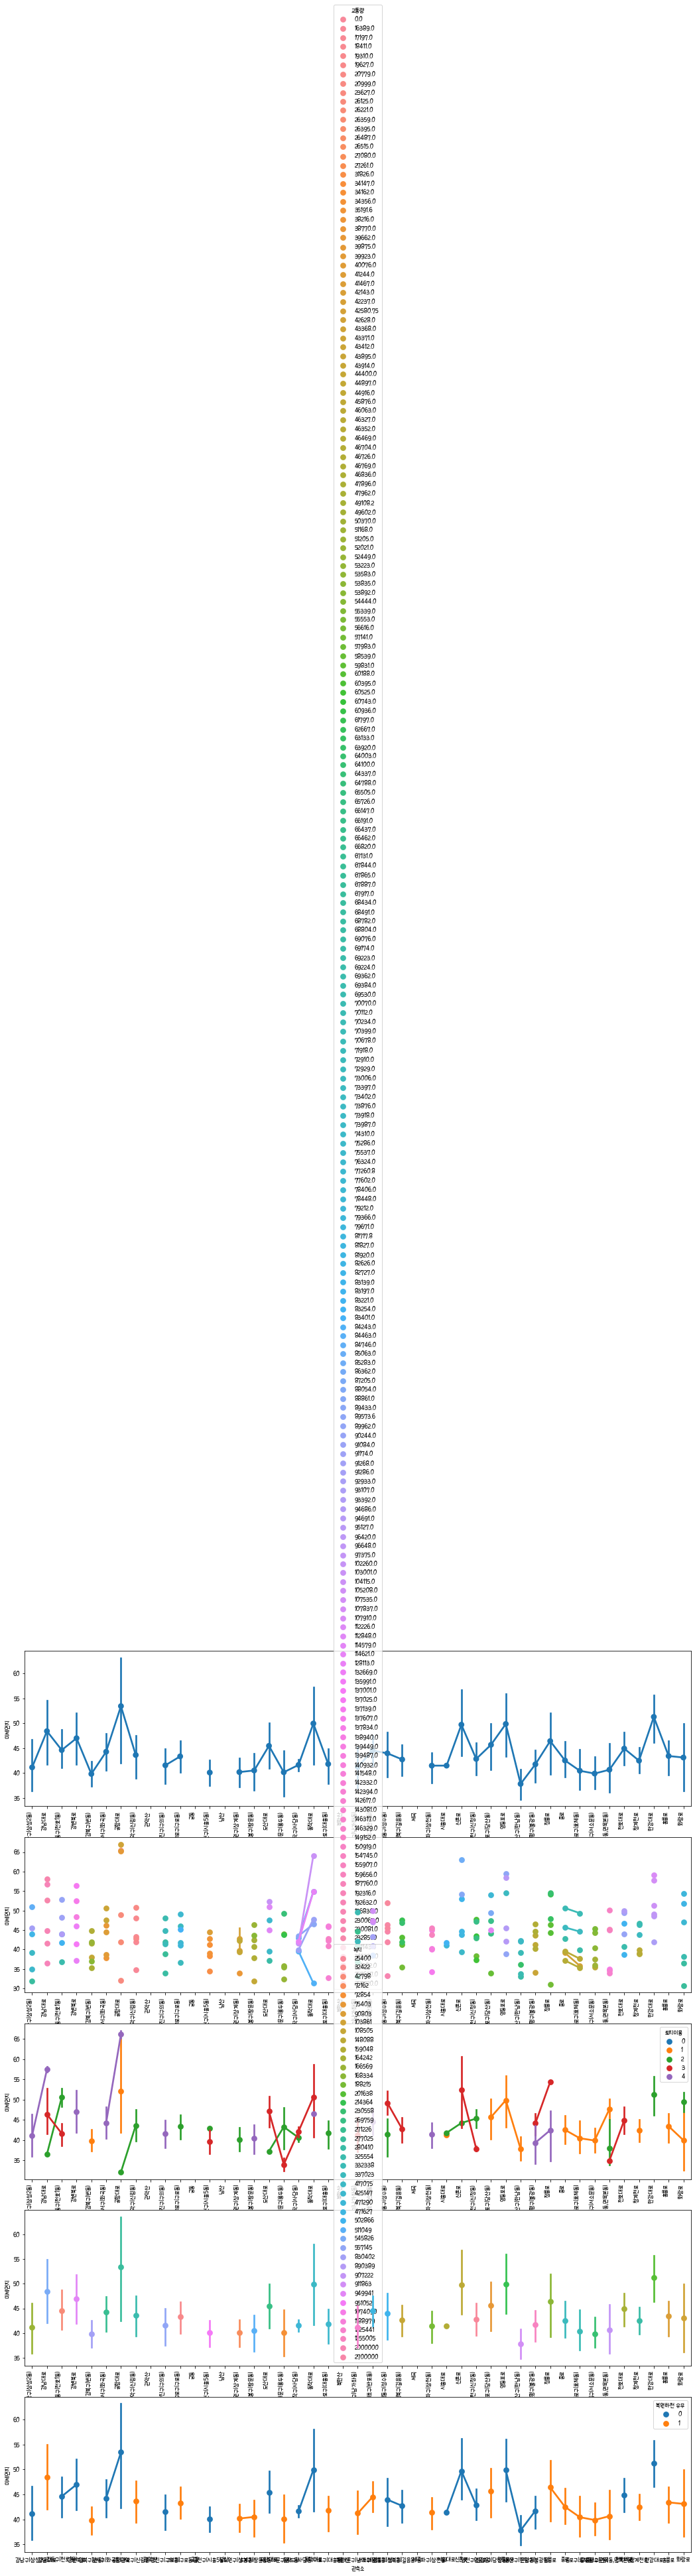

In [8]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=5)
fig.set_size_inches(18,25)
ax1.set_xticklabels('관측소', rotation=90, ha='right')
ax2.set_xticklabels('관측소', rotation=90, ha='right')
ax3.set_xticklabels('관측소', rotation=90, ha='right')
ax4.set_xticklabels('관측소', rotation=90, ha='right')

sns.pointplot(data=river,x="관측소",y="미세먼지",ax=ax1)
sns.pointplot(data=river,x="관측소",y="미세먼지",hue="교통량",ax=ax2)
sns.pointplot(data=river,x="관측소",y="미세먼지",hue="토지이용",ax=ax3)
sns.pointplot(data=river,x="관측소",y="미세먼지",hue="녹지",ax=ax4)
sns.pointplot(data=river,x="관측소",y="미세먼지",hue="복원하천 유무",ax=ax5)

In [98]:
river.head(100)

,관측소,is_2015,is_2016,is_2017,is_2018,is_2019,is_2020,미세먼지,토지,소매(범위),...,최대 순간 풍속(m/s),최대 순간 풍속 풍향(deg),최대 순간 풍속 나타난날(yyyymmdd),강수량합(mm),is_restore,propensity_score,strata,dbar,d_y,dbar_y
0,강남구(삼성2동),1,0,0,0,0,0,45.572411,75.457170,2,...,18.1,NaN,20150603.0,818.0,False,0.494519,12.0,1,0.0,45.572411
1,강남구(삼성2동),0,1,0,0,0,0,51.029344,72.504378,3,...,16.5,295.3,20160504.0,1005.5,False,0.496977,14.0,1,0.0,51.029344
2,강남구(삼성2동),0,0,1,0,0,0,43.959616,68.389662,3,...,21.9,NaN,20171219.0,1246.0,False,0.495040,13.0,1,0.0,43.959616
3,강남구(삼성2동),0,0,0,1,0,0,34.949233,69.444444,3,...,16.1,208.1,20180410.0,1312.5,False,0.501362,16.0,1,0.0,34.949233
4,강남구(삼성2동),0,0,0,0,1,0,39.290712,69.920844,3,...,13.3,222.2,20190330.0,981.5,False,0.502933,17.0,1,0.0,39.290712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,동작구(사당동),0,0,0,0,0,1,39.562240,85.615251,2,...,15.4,348.8,20200903.0,1820.5,False,0.508391,21.0,1,0.0,39.562240
114,동작대로,1,0,0,0,0,0,54.912329,76.362655,1,...,11.1,208.1,20150402.0,914.0,False,0.500439,15.0,1,0.0,54.912329
115,동작대로,0,1,0,0,0,0,64.153005,78.723404,2,...,12.7,241.9,20160504.0,977.0,False,0.488416,11.0,1,0.0,64.153005
116,동작대로,0,0,1,0,0,0,54.868493,74.962293,2,...,11.6,239.1,20170414.0,1100.0,False,0.476482,8.0,1,0.0,54.868493


In [93]:
river.isna().sum()

관측소                          0
is_2015                      0
is_2016                      0
is_2017                      0
is_2018                      0
is_2019                      0
is_2020                      0
미세먼지                         0
토지                           0
소매(범위)                       0
음식(범위)                       0
생활서비스(범위)                    0
토지이용                         0
교통량                          0
복원하천 유무                      0
복원하천 면적                    116
녹지                           0
평균기온(°C)                     4
평균최고기온(°C)                   4
최고기온(°C)                     0
평균최저기온(°C)                   4
최고기온 나타난날(yyyymmdd)          0
최저기온(°C)                     0
최저기온 나타난날(yyyymmdd)          0
평균 풍속(m/s)                   5
최대 순간 풍속(m/s)                0
최대 순간 풍속 풍향(deg)             8
최대 순간 풍속 나타난날(yyyymmdd)      0
강수량합(mm)                     0
is_restore                   0
dtype: int64

In [92]:
river = river.dropna(subset=['미세먼지'], how='any', axis=0)
river = river.dropna(subset=['교통량'], how='any', axis=0)

In [90]:
river["is_restore"]=river["복원하천 유무"].apply(lambda x: True if x == 1 else False)
#river["is_ready"]=river["복원하천 면적"].apply(lambda x: True if x > 0 else False)
#river["is_토지이용"]=river["토지종"].apply(lambda x: True if (x=="상업지구") or (x=="준공업지구")  else False)
#river["is_2017"] = river["year"].apply(lambda x: True if x==2017 else False)

In [97]:
restore_effect = CausalModel(
    data=river,
    treatment = "is_restore",
    outcome = "미세먼지",
    common_causes = "교통량+토지+녹지면적+is_2015+is_2016+is_2017+is_2018+is_2019+is_2020".split("+"))

restore_identified = restore_effect.identify_effect()

restore_matching = restore_effect.estimate_effect(restore_identified,method_name = "backdoor.propensity_score_matching")
restore_stratify = restore_effect.estimate_effect(restore_identified,method_name = "backdoor.propensity_score_stratification")

print("Causal Estimate of Matching: {}".format(restore_matching.value))
print("Causal Estimate of Stratification: {}".format(restore_stratify.value))

WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n]  y


C:\Users\ChoYongSang\anaconda3\envs\pydatavenv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ChoYongSang\anaconda3\envs\pydatavenv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


ValueError: Method requires strata with number of data points per treatment > clipping_threshold (=10). No such strata exists. Consider decreasing 'num_strata' or 'clipping_threshold' parameters.

In [ ]:
#모디파이어 고려(트리트먼트와 결과에 동시에 영향을 주는 요소)
mass_effect = CausalModel(
    data=river,
    treatment = "복원하천면적",
    outcome   = "미세먼지",
    common_causes = "교통량+녹지면적+토지이용+시간더미".split("+"),
    effect_modifiers = "하천폭".split("+"))

mass_identified = mass_effect.identify_effect()

mass_matching = mass_effect.estimate_effect(mass_identified,method_name = "backdoor.propensity_score_matching")
mass_stratify = mass_effect.estimate_effect(mass_identified,method_name = "backdoor.propensity_score_stratification")

print("Causal Estimate of Matching: {}".format(mass_matching.value))
print("Causal Estimate of Stratification: {}".format(mass_stratify.value))

In [ ]:
# 1. 무관한 교란변수 생성
restore_random    = restore_effect.refute_estimate(restore_identified, restore_matching,method_name="random_common_cause")
# 2. 가짜 처리 생성
restore_placebo   = restore_effect.refute_estimate(restore_identified, restore_matching,method_name="placebo_treatment_refuter", placebo_type="permute")
# 3. 일부만 추출(서브셋 변경할것)
restore_subset    = restore_effect.refute_estimate(restore_identified, restore_matching,method_name="data_subset_refuter", subset_fraction=0.8)

restore_random_str    = restore_effect.refute_estimate(restore_identified, restore_stratify,method_name="random_common_cause")
restore_placebo_str   = restore_effect.refute_estimate(restore_identified, restore_stratify,method_name="placebo_treatment_refuter", placebo_type="permute")
restore_subset_str    = restore_effect.refute_estimate(restore_identified, restore_stratify,method_name="data_subset_refuter", subset_fraction=0.8)

In [ ]:
print(restore_random)
print(restore_placebo)
print(restore_subset)

print(restore_random_str)
print(restore_placebo_str)
print(restore_subset_str)